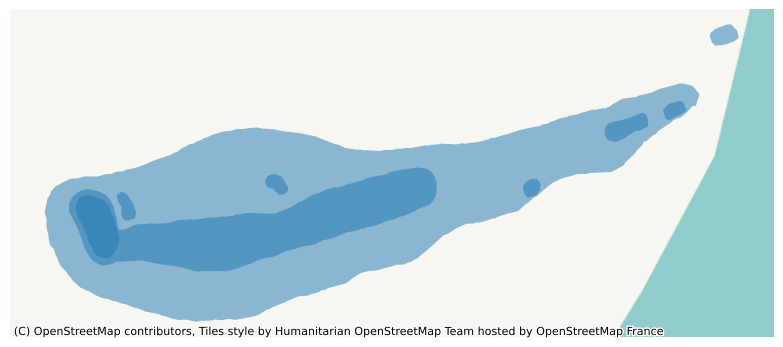

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import LineString
from shapely.ops import transform
import pyproj

#my_dpi=228.71

# Replace 'your_kml_file.kml' with the actual path to your KML file
file_path = '{kml file here}'

try:
    gdf = gpd.read_file(file_path)

    # Check if the GeoDataFrame is empty
    if not gdf.empty:
        # Ensure the CRS is set to a projected coordinate system for basemap
        if gdf.crs is None:
            gdf = gdf.set_crs("EPSG:32630") # Set a default CRS if none is found

        # Reproject to a projected CRS (e.g., UTM) for accurate distance calculations
        try:
            gdf = gdf.to_crs(epsg=32630)  # Or a more suitable UTM zone
        except Exception as e:
            print(f"Error reprojecting data: {e}. Proceeding without reprojecting. Distances may be inaccurate.")

        # Calculate distances and plot
        ax = gdf.plot(figsize=(14, 4.25), alpha=.5) # slightly transparent lines
        
        for index, row in gdf.iterrows():
            line = row['geometry']
            if isinstance(line, LineString):
                distance_meters = line.length
                distance_yards = distance_meters * 1.09361
                end_point = line.coords[-1] # Get the coordinates of the last point

                plt.plot(end_point[0], end_point[1], marker='x', color='black')  #Plot end point
                plt.text(end_point[0], end_point[1], f'{distance_yards:.2f} yds', fontsize=8)


        ctx.add_basemap(ax)
        plt.title('')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.axis('off')
        plt.show()


    else:
        print(f"Warning: KML file '{file_path}' appears to be empty or could not be parsed correctly.")

except FileNotFoundError:
    print(f"Error: KML file not found at '{file_path}'. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

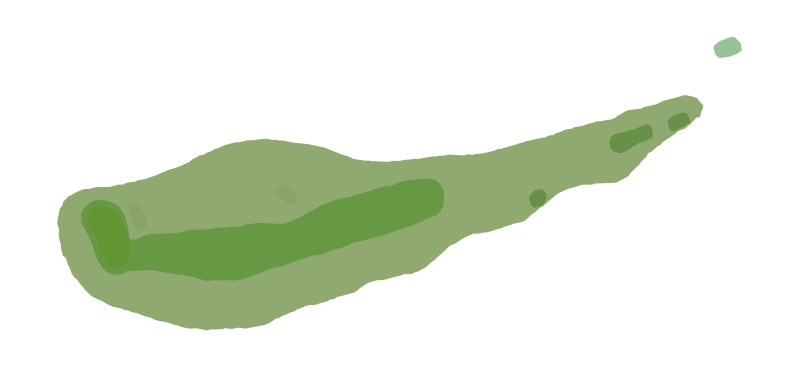

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import LineString
import pyproj
import re

my_dpi=228.71

# Define color mapping function
def get_color(name):
    if re.search(r'_tee$', name): return "#57B740"
    elif re.search(r'tee2$', name): return "#57B740"
    elif re.search(r'_bunker$', name): return "#EDE6D3"
    elif re.search(r'_water$', name): return "#2243b6"
    elif re.search(r'fw$', name): return "#57B740"
    elif re.search(r'_green$', name): return "#86D14A"
    elif re.search(r'_hazard$', name): return "#094d1d"
    elif re.search(r'path$', name): return "#9e9e9ecc"
    elif re.search(r'_fwtree$', name): return "#4e772acc"
    elif re.search(r'_ob$', name): return "#b0afafcc"
    elif re.search(r'_tree$', name): return "#57a239cc"
    elif re.search(r'_path$', name): return "#b8b8b8cc"
    elif re.search(r'_fringe$', name): return "#43ff64d9"
    elif re.search(r'_rough$', name): return "#467112cc" 
    else: return "#529a53cc"  # Default color if no match

# Replace 'your_kml_file.kml' with the actual path to your KML file
file_path = '{kml file here}'
try:
    gdf = gpd.read_file(file_path)
    # Apply color mapping
    gdf['color'] = gdf['Name'].apply(get_color)
    if not gdf.empty:
        # Ensure the CRS is set 
        if gdf.crs is None:
            gdf = gdf.set_crs("EPSG:32630")
        try:
            gdf = gdf.to_crs(epsg=32630)
        except Exception as e:
            print(f"Error reprojecting data: {e}. Distances may be inaccurate.")
        fig, ax = plt.subplots(figsize=(972.02/my_dpi, 1600.97/my_dpi), dpi=my_dpi) # Set figure size
        gdf.plot(ax=ax, color=gdf['color'], alpha=0.6)
        for index, row in gdf.iterrows():
            line = row['geometry']
            if isinstance(line, LineString):
                distance_meters = line.length
                distance_yards = distance_meters * 1.09361
                end_point = line.coords[-1] # Changed to get the last coordinate
                plt.plot(end_point[0], end_point[1], marker='x', color='black', markersize=.25, alpha=1)

                # Calculate text position relative to the line's endpoint
                dx = 0 # Adjust horizontal offset as needed
                dy = 8 # Adjust vertical offset as needed

                # Get the angle of the line
                import math
                if len(line.coords) > 1:
                    x_diff = line.coords[-1][0] - line.coords[-2][0]
                    y_diff = line.coords[-1][1] - line.coords[-2][1]
                    angle = math.atan2(y_diff, x_diff)
                    dx = dy * math.sin(angle) # Calculate dx based on angle and dy
                    dy = dy * math.cos(angle) # Calculate dy based on angle and dx

                plt.text(end_point[0] + dx, end_point[1] + dy, f'{distance_yards:.2f} yds', fontsize=6, color='black', ha='center', va='bottom')
        #Remove axis elements
        #plt.savefig('woburn1', bbox_inches='tight')  # Save plot as JPG
        plt.axis('off')
        fig.patch.set_alpha(0.0)  # Make background transparent

        plt.show()
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

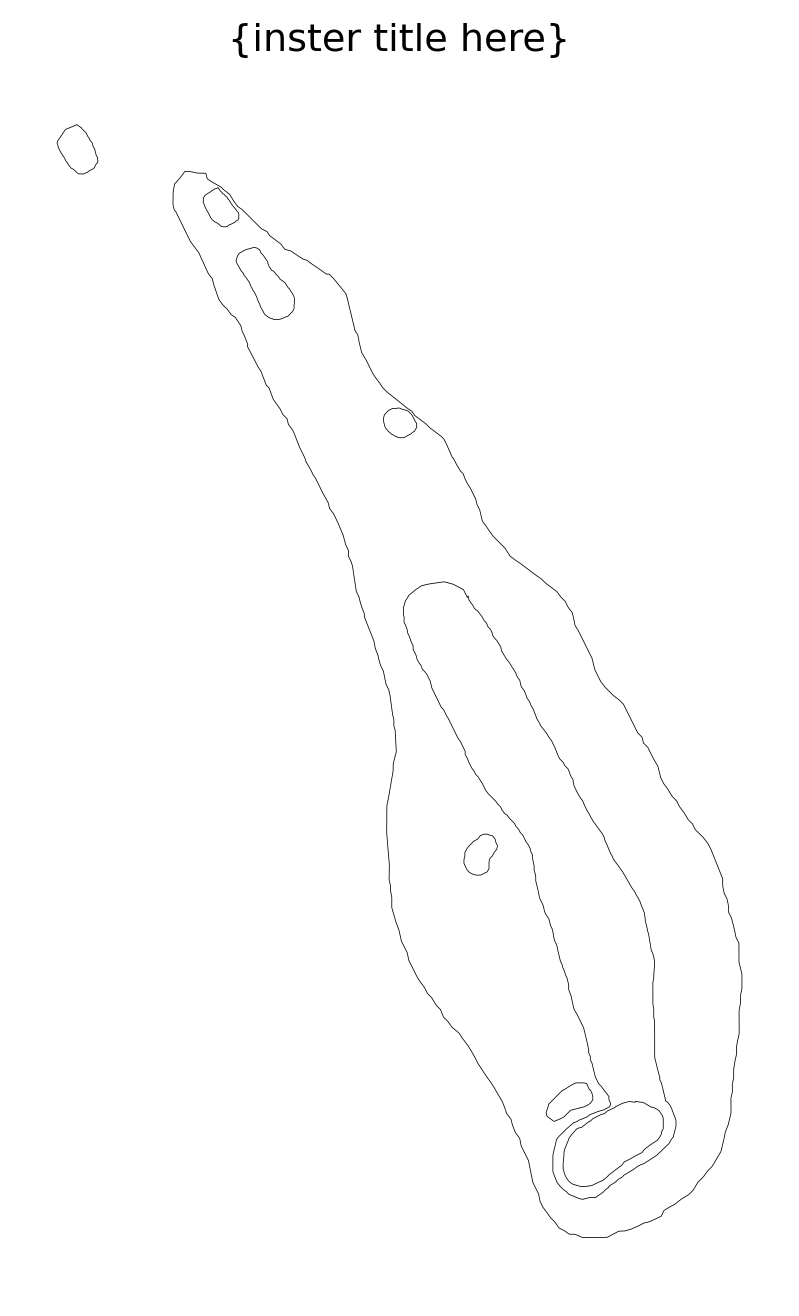

In [ ]:
try:
  gdf = gpd.read_file('{kml file here}')

  # Plot the shapes without fill
  fig, ax = plt.subplots(1, 1, figsize=(972.02/my_dpi, 1600.97/my_dpi), dpi=my_dpi)
  gdf.plot(ax=ax, facecolor="none", edgecolor='black', linewidth=.25, markersize=.5)  # Set facecolor to "none"
  ax.set_title("{inster title here}")
  #plt.savefig('{insert title here}', bbox_inches='tight')  # Save plot as JPG
  plt.axis('off')
  plt.show()

except FileNotFoundError:
  print("Error: File not found at *.geojson. Please make sure the file exists in the specified path.")
except Exception as e:
  print(f"An error occurred: {e}")

❌ Does NOT fit at max-detail scale.
➡️ Min scale to fit one page ≈ 52.44 yards/inch (portrait).
✅ That scale is allowed (less detailed than max).


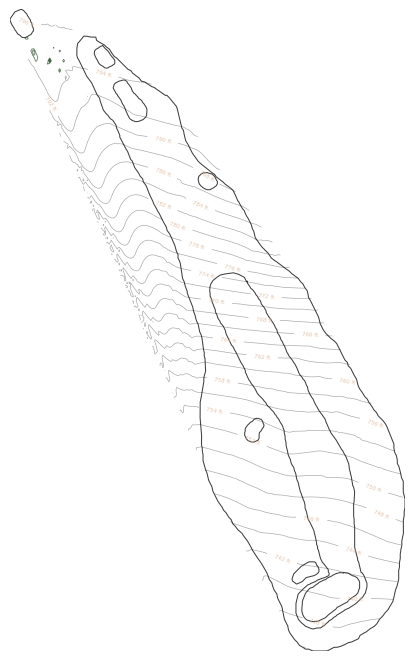

In [ ]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import geopandas as gpd
from scipy.interpolate import griddata
from geopy.distance import geodesic
import os

# File paths
gpx_path = os.path.expanduser('{gpx file here}')  # Replace with actual path
kml_path = os.path.expanduser('{kml file here}')  # Replace with actual path

# Load and fix the GPX file
with open(gpx_path, 'rb') as f:
    content = f.read()
content_fixed = content.replace(b'\xe2\x80\x9c', b'"').replace(b'\xe2\x80\x9d', b'"')

# Write fixed GPX back
with open(gpx_path, 'wb') as f:
    f.write(content_fixed)

# Parse the GPX file
tree = ET.parse(gpx_path)
root = tree.getroot()
namespace = {'default': 'http://www.topografix.com/GPX/1/1'}

# Extract track points
elevations, latitudes, longitudes = [], [], []
for trkpt in root.findall('.//default:trkpt', namespace):
    lat = float(trkpt.attrib['lat'])
    lon = float(trkpt.attrib['lon'])
    ele = float(trkpt.find('default:ele', namespace).text)
    latitudes.append(lat)
    longitudes.append(lon)
    elevations.append(ele)


# Prepare data
latitudes = np.array(latitudes)
longitudes = np.array(longitudes)
elevations = np.array(elevations)

# Interpolation grid
num_points = 200
grid_lon, grid_lat = np.meshgrid(
    np.linspace(longitudes.min(), longitudes.max(), num_points),
    np.linspace(latitudes.min(), latitudes.max(), num_points)
)

# Interpolate elevation data
grid_elev = griddata(
    (longitudes, latitudes),
    elevations,
    (grid_lon, grid_lat),
    method='cubic'
)

# Calculate slope
dy, dx = np.gradient(grid_elev, np.mean(np.diff(grid_lat[:, 0])), np.mean(np.diff(grid_lon[0, :])))
slope_degrees = np.degrees(np.arctan(np.sqrt(dx**2 + dy**2)))

# Compute real-world size for USGA scale limit
top_left = (latitudes.max(), longitudes.min())
top_right = (latitudes.max(), longitudes.max())
bottom_left = (latitudes.min(), longitudes.min())

width_meters = geodesic(top_left, top_right).meters
height_meters = geodesic(top_left, bottom_left).meters
width_yards = width_meters * 1.09361
height_yards = height_meters * 1.09361

required_width_inches = width_yards/13.33
required_height_inches = height_yards/13.33

# ------------------------------
# USGA page-size check
# ------------------------------
USGA_IN_W, USGA_IN_H = 4.25, 7.0         # inches
MAX_YD_PER_IN = 51.68                    # USGA max-detail scale

max_w_yards = USGA_IN_W * MAX_YD_PER_IN
max_h_yards = USGA_IN_H * MAX_YD_PER_IN

# Check both orientations
fits_portrait  = (width_yards  <= max_w_yards) and (height_yards <= max_h_yards)
fits_landscape = (width_yards  <= max_h_yards) and (height_yards <= max_w_yards)

if fits_portrait or fits_landscape:
    orientation = "portrait" if fits_portrait else "landscape"
    print(f"✅ Fits on a 4.25×7 page at 1\"=13.33 yd ({orientation}).")
else:
    req_scale_portrait  = max(width_yards/USGA_IN_W, height_yards/USGA_IN_H)
    req_scale_landscape = max(width_yards/USGA_IN_H, height_yards/USGA_IN_W)
    req_scale = min(req_scale_portrait, req_scale_landscape)

    print("❌ Does NOT fit at max-detail scale.")
    print(f"➡️ Min scale to fit one page ≈ {req_scale:.2f} yards/inch "
          f"({'portrait' if req_scale==req_scale_portrait else 'landscape'}).")

    if req_scale < MAX_YD_PER_IN:
        print("⚠️ That would be *too detailed* (not USGA-compliant).")
    else:
        print("✅ That scale is allowed (less detailed than max).")

# Create figure and axes
fig, ax = plt.subplots(figsize=(USGA_IN_W, USGA_IN_H))

# Plot slope as contour lines
contour_lines = ax.contour(
    grid_lon, grid_lat, slope_degrees, levels=5, colors="#2d552d", linewidths=0.6, alpha=.75
)

# Plot elevation contours in feet
grid_elev_ft = grid_elev * 3.28084
elevation_contours = ax.contour(
    grid_lon, grid_lat, grid_elev_ft,
    levels=35, colors='black', linewidths=0.5, alpha=.33
)

# Add labels to elevation contours (fix for alpha)
clabels = ax.clabel(elevation_contours, fmt='%1.0f ft', fontsize=4, colors="#dfb08a")
for label in clabels:
    label.set_alpha(0.75)

# Overlay KML data
gdf = gpd.read_file(kml_path)
gdf.plot(ax=ax, facecolor='none', edgecolor="#000000", linewidth=0.75, markersize=.5, alpha=.75) #facecolor='green',

# Final touches
ax.set_axis_off()
plt.tight_layout()
fig.patch.set_alpha(0.0)  # Make background transparent

# Choose orientation that matched your fit check
PAGE_W_IN, PAGE_H_IN = 4.25, 7.0     # portrait; swap for landscape if needed

fig = plt.gcf()
fig.set_size_inches(PAGE_W_IN, PAGE_H_IN)  # exact physical size


# High-res raster (great for imagery/rasters)
#fig.savefig("/path/to/{your_data_folder}/", dpi=1200, bbox_inches="tight", pad_inches=0.0) #change the name to whatever hole from whatever course

# Vector versions (best for lines, labels, contours; rasters stay raster)
plt.rcParams["pdf.fonttype"] = 42  # keep text as text
plt.rcParams["ps.fonttype"]  = 42
#fig.savefig("/path/to/{your_data_folder}/", bbox_inches="tight", pad_inches=0.0) #change the name to whatever hole from whatever course
##fig.savefig("/path/to/{your_data_folder}/", bbox_inches="tight", pad_inches=0.0) #change the name to whatever hole from whatever course


plt.show()

# Save as PNG if needed
#fig.savefig('Breck 1 combined elev.jpg', dpi=300, bbox_inches='tight') #change the name to whatever hole from whatever course

